# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOAD THE CSV FILE
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# DATA EXPLORATION

In [3]:
df.info()
# show details informaton about the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# statistical data representation
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.corr()
#getting correlation of numerical columns

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Correlation is a number that indicates how the two attributes are related to each other. 
As this number approaches 1.0, the relationship is strengthened in the right direction. 
As it approaches -1.0, it is strengthened in the opposite direction. 
If this value is close to zero, the bond between the two data is weak

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


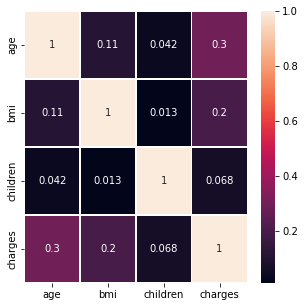

In [7]:
fig, axes = plt.subplots(figsize=(5,5))  # This method creates a figure and a set of subplots
sns.heatmap(data=df.corr(), annot=True, linewidths=.5, ax=axes)  # Figure out heatmap
# Parameters:
# data : 2D data for the heatmap.
# annot : If True, write the data value in each cell.
# linewidths : Width of the lines that will divide each cell.
# ax : Axes in which to draw the plot, otherwise use the currently-active Axes.
plt.show() 

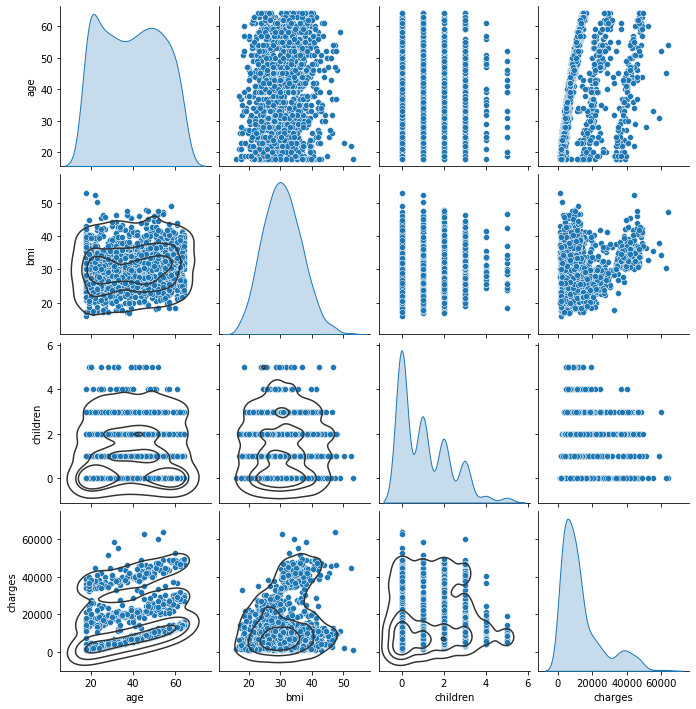

In [8]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

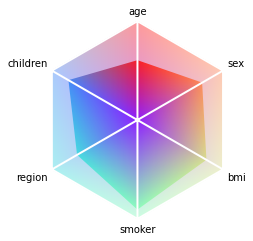

In [10]:
#the relationship of the data we have
import matplotlib.tri as tri

proportions = [0.6, 0.75, 0.8, 0.9, 0.7, 0.8]
labels = ['age', 'sex', 'bmi', 'smoker', 'region', 'children']
N = len(proportions)
proportions = np.append(proportions, 1)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)
triangles = [[N, i, (i + 1) % N] for i in range(N)]
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)
cmap = plt.cm.rainbow_r  # or plt.cm.hsv ?
colors = np.linspace(0, 1, N + 1)
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
plt.triplot(triang_backgr, color='white', lw=2)
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label,  # color=cmap(color),
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')
plt.axis('off')
plt.gca().set_aspect('equal')
plt.show()

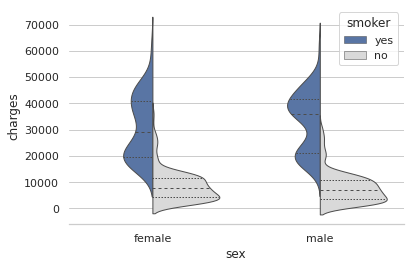

In [11]:
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="sex", y="charges", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"yes": "b", "no": ".85"})
sns.despine(left=True)

# Data Visualization

Trying to use data visualization techniques for better examining and evaluate the
data

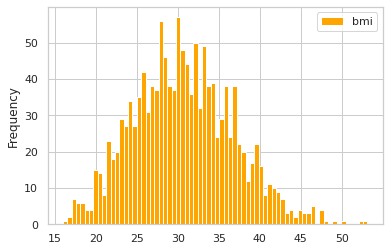

In [12]:
df.plot(kind="hist", y="bmi", bins=70, color="orange")

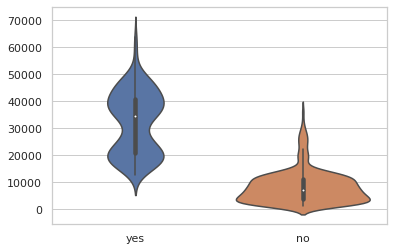

In [13]:
#Examine the relationship between “smoker” and “charges”
sns.violinplot(df['smoker'].values,df['charges'].values)

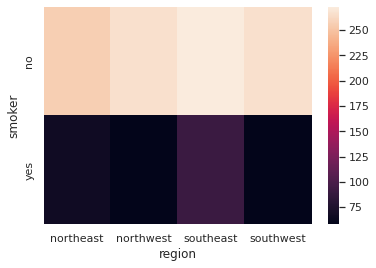

In [14]:
# Examine the relationship between “smoker” and “region”

map2 = pd.crosstab(df['smoker'], df['region'])
sns.heatmap(map2)  #Most male are from souteast

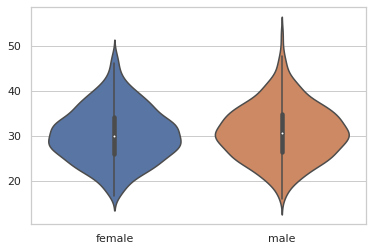

In [15]:
# Examine the relationship between “bmi” and “sex”.
sns.violinplot(df['sex'].values,df['bmi'].values)

In [17]:
# Find the "region" with the most "children".
df1 = df['region'] = df['children'] >0
df1

0       False
1        True
2        True
3       False
4       False
        ...  
1333     True
1334    False
1335    False
1336    False
1337    False
Name: children, Length: 1338, dtype: bool

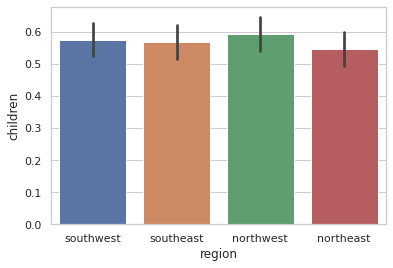

In [16]:
sns.barplot(df['region'],df['children']>0)

#northwest region have more children followed by southwest

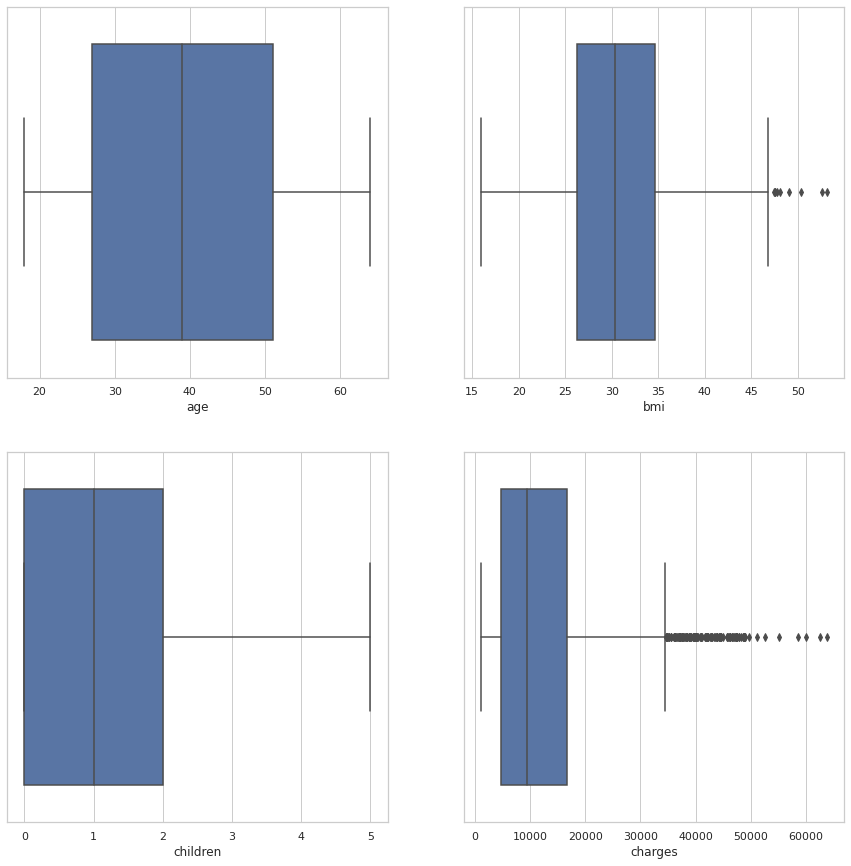

In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
j = 1
fig  = plt.figure(figsize= (15,15))
for i in newdf.columns:
 
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    j=j+1

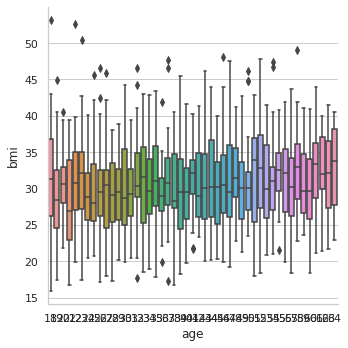

In [19]:
# Examine the relationship between “age” and “bmi”.
sns.catplot(x='age', y = 'bmi', kind='box', data = df)

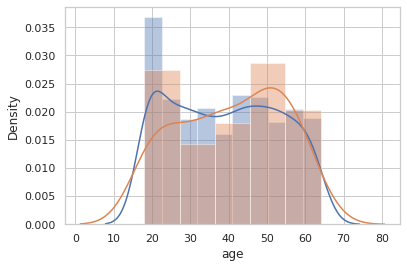

In [20]:
sns.distplot(df[df['bmi'] < 40]['age'])
sns.distplot(df[df['bmi'] > 40]['age'])
#We can clearly see that if age > 40 then charges are higher than 20000

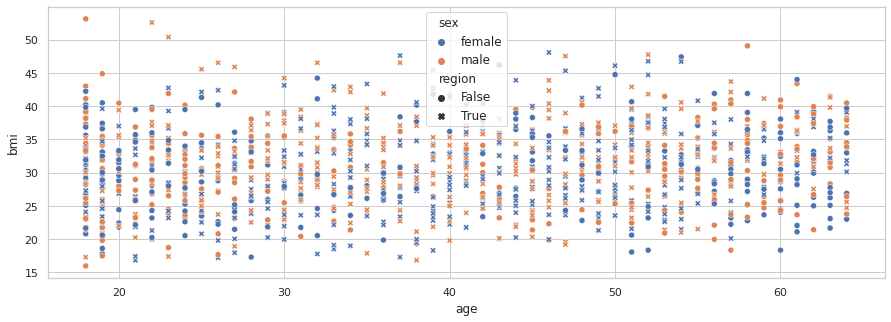

In [21]:
fig =plt.figure(figsize = (15,5))
sns.scatterplot(df['age'],df['bmi'], hue =df['sex'],style=df['region'])

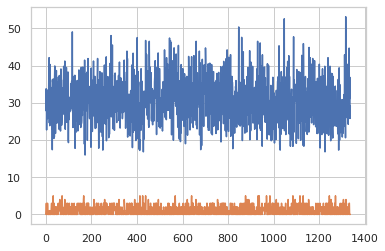

In [22]:
#Examine the relationship between “bmi” and “children”

plt.plot(df['bmi'])
plt.plot(df['children'])

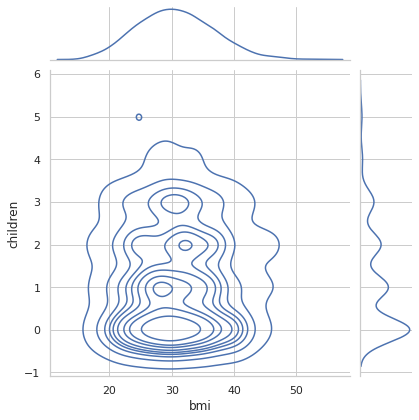

In [23]:
# Examine the relationship between “bmi” and “children”

sns.jointplot(x="bmi", y="children", data=df, kind="kde")

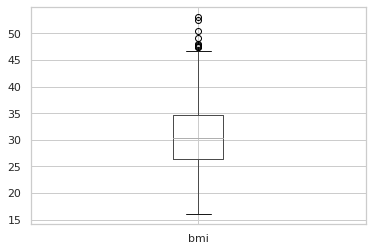

In [24]:
#Is there an outlier in the "bmi" variable? Please review.

df.boxplot(column="bmi")
#yes, there are outliers present between 45-50 region as you can able to see by this boxplot

In [25]:
df['bmi'].skew()

0.2840471105987448

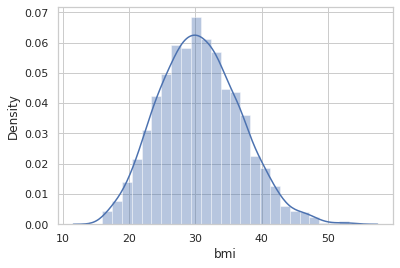

In [26]:
sns.distplot(df['bmi'])
#Data here is a bit right skewed

In [27]:
# Using IQR method to capp the outlier

q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)

iqr = q3 - q1 

mini = q1 - 1.5 *iqr 
maxi = q3 + 1.5 *iqr


df['bmi'] = np.where(
    df['bmi'] > maxi,
    maxi,
    np.where(
        df['bmi'] < mini,
        mini,
        df['bmi']
    )
)

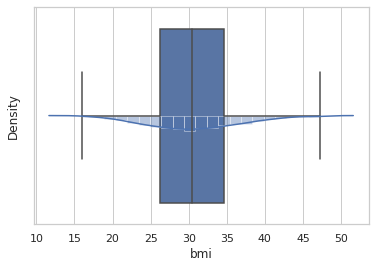

In [28]:
# after handling outlier 
sns.boxplot(df['bmi'])
sns.distplot(df['bmi'])

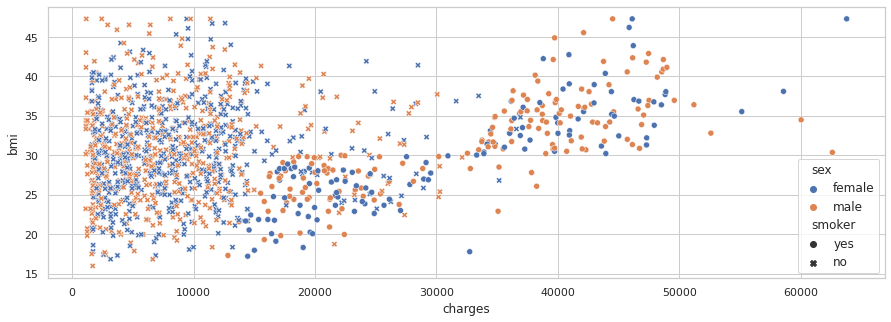

In [29]:
# Examine the relationship between “bmi” and “charges”

# bmi vs charges 

fig =plt.figure(figsize = (15,5))
sns.scatterplot(df['charges'],df['bmi'], hue =df['sex'],style=df['smoker'])

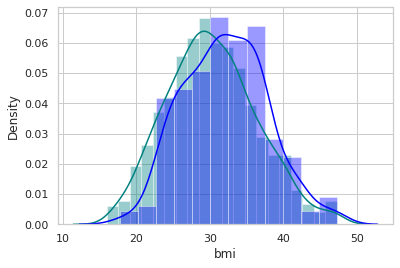

In [30]:
sns.distplot(df[df['charges'] < 20000]['bmi'],color = 'teal')
sns.distplot(df[df['charges'] > 20000]['bmi'],color ='blue')

#If the bmi > 30 then charges also increase

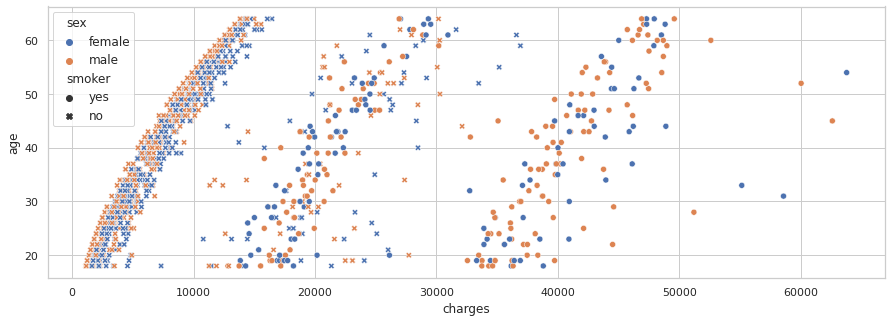

In [31]:
# age vs charges
fig =plt.figure(figsize = (15,5))
sns.scatterplot(df['charges'],df['age'], hue =df['sex'],style=df['smoker'])

# clearly observe that smoker have high charges

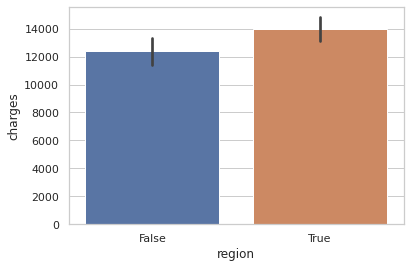

In [32]:
sns.barplot(df['region'],df['charges'])

#Southeast people are charged more followed by northeast

#Southwest and Northwest are equaly charged

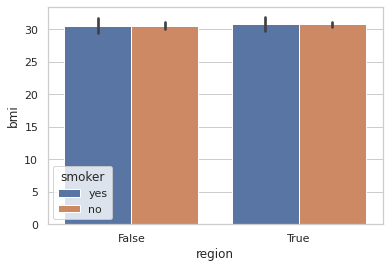

In [33]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

sns.barplot(df['region'],df['bmi'],df['smoker'])

# Data Preprocessing

In [34]:
# One Hot Encoding

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,False,16884.92400
1,18,male,33.770,1,no,True,1725.55230
2,28,male,33.000,3,no,True,4449.46200
3,33,male,22.705,0,no,False,21984.47061
4,32,male,28.880,0,no,False,3866.85520


In [36]:
new_df = pd.get_dummies(df,columns = ['sex','smoker','region'],drop_first= True)

new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_True
0,19,27.900,0,16884.92400,0,1,0
1,18,33.770,1,1725.55230,1,0,1
2,28,33.000,3,4449.46200,1,0,1
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0


In [37]:
# Split your dataset into X_train,X_test, y_train, y_test

from sklearn.model_selection import train_test_split  # Import "train_test_split" method

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
x= new_df.drop(columns = ['charges'])
y = new_df['charges']

x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size=0.4,random_state =12)

In [39]:
#output
y = new_df['charges']

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [40]:
#input

x = new_df.drop('charges', axis=1)
x.head()

,age,bmi,children,sex_male,smoker_yes,region_True
0,19,27.900,0,0,1,0
1,18,33.770,1,1,0,1
2,28,33.000,3,1,0,1
3,33,22.705,0,1,0,0
4,32,28.880,0,1,0,0


In [41]:
# splitting
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [42]:
print("Shape of original dataset :", df.shape)

print("shape of input - training set :", x_train.shape)

print("shape of output - training set: ", y_train.shape)

print("shape of input - testing set: ", x_test.shape)

print("shape of output - testing set:", y_test.shape)

Shape of original dataset : (1338, 7)
shape of input - training set : (1070, 6)
shape of output - training set:  (1070,)
shape of input - testing set:  (268, 6)
shape of output - testing set: (268,)


In [43]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
normalize_train_X = normalizer.fit_transform(x_train)
normalize_train_X

array([[0.53583388, 0.84274762, 0.02976855, 0.02976855, 0.        ,
        0.02976855],
       [0.57785596, 0.80972067, 0.09630933, 0.02407733, 0.        ,
        0.02407733],
       [0.81183036, 0.58389337, 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.75897561, 0.6504916 , 0.01649947, 0.01649947, 0.        ,
        0.01649947],
       [0.65455666, 0.75601295, 0.        , 0.        , 0.        ,
        0.        ],
       [0.53934481, 0.83949019, 0.05393448, 0.02696724, 0.        ,
        0.02696724]])

In [44]:
#normalize testing data
normalized_test_x =normalizer.transform(x_test)
normalized_test_x

array([[0.87807038, 0.47760142, 0.01721707, 0.01721707, 0.        ,
        0.01721707],
       [0.81756447, 0.57474782, 0.02043911, 0.        , 0.02043911,
        0.02043911],
       [0.91529988, 0.40237301, 0.        , 0.01794706, 0.        ,
        0.        ],
       ...,
       [0.58694256, 0.80962857, 0.        , 0.        , 0.        ,
        0.        ],
       [0.90304259, 0.42894523, 0.01612576, 0.        , 0.        ,
        0.01612576],
       [0.80931992, 0.58715367, 0.        , 0.01586902, 0.        ,
        0.        ]])

# Model

In [45]:
# Split the dataset into train and val 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.2)

In [46]:
#Creating and training models

from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [47]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor() 
  

In [48]:
from sklearn.linear_model import SGDRegressor

SGDRegressor_regressor = SGDRegressor()

In [49]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [50]:
SGDRegressor_regressor.fit(x_train, y_train)

SGDRegressor()

In [51]:
# predictions
temp = regressor.predict(x_val)

In [52]:
temp_ = SGDRegressor_regressor.predict(x_val)

# Comparing the performances

In [53]:
regressor_report = r2_score(y_val, temp)

In [54]:
SGDRegressor_regressor_report = mean_absolute_percentage_error(y_val, temp)

In [55]:
# Print the report of the Logistic Regression model
print('***** regressor_report *****')
print(regressor_report)

***** regressor_report *****
0.7119122943787815


In [56]:
# Print the report of the Ridge Regression model
print('***** SGDRegressor_regressor_report *****')
print(SGDRegressor_regressor_report)

***** SGDRegressor_regressor_report *****
0.33883398628633743


# Evaluation

In [57]:
final = regressor.predict(x_test)

In [58]:
final_report = r2_score(y_test, final)

In [59]:
print(final_report)

0.7149634025094082



*Thank you*

***Global Al Hub international Bootcamp***

Project Work on Medical Cost Analysis

*Aaisha Khan | Çağatay Şengün | Izzah Shafique*
